In [ ]:
# use google colab because of some technical issue in jupyter notebook
#Import library for data visualization and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
customers = pd.read_csv('drive/My Drive/vikii/data science project/Customers.csv')

In [13]:
products = pd.read_csv('drive/My Drive/vikii/data science project/Products.csv')

In [14]:
transactions = pd.read_csv('drive/My Drive/vikii/data science project/Transactions.csv')

In [15]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [16]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [17]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [18]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [19]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [20]:
print(customers.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [21]:
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [22]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


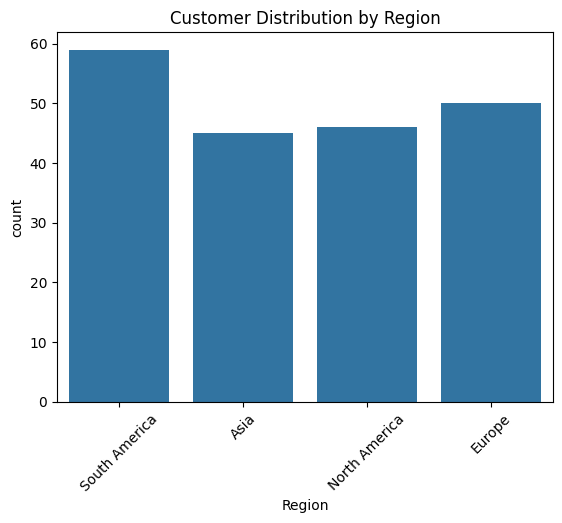

In [23]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

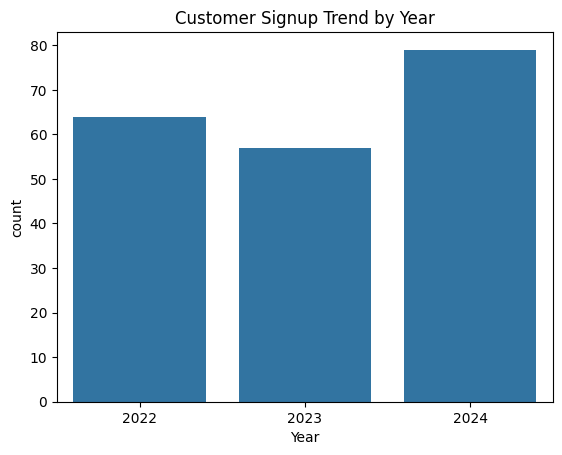

In [24]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year
sns.countplot(data=customers, x='Year')
plt.title('Customer Signup Trend by Year')
plt.show()

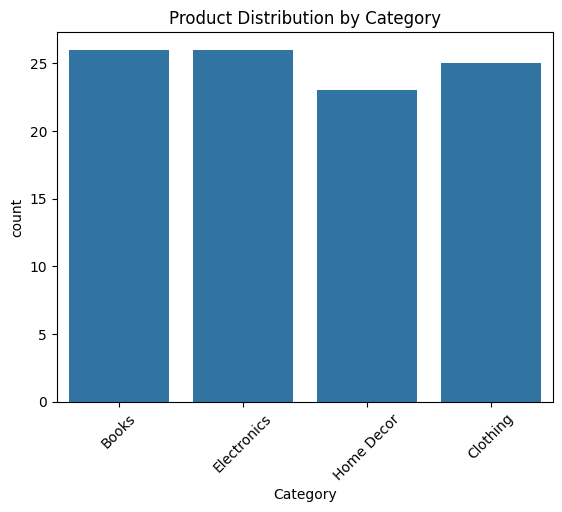

In [25]:
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

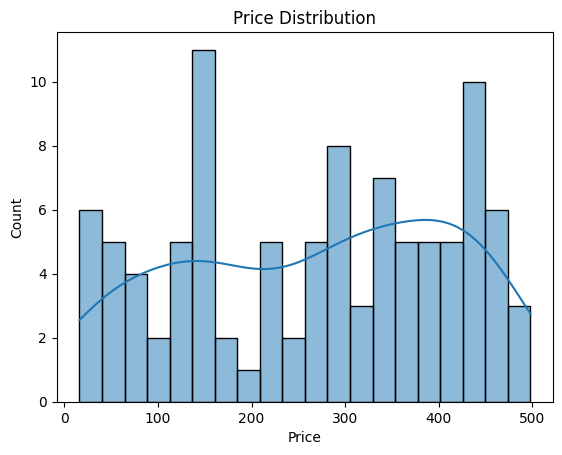

In [26]:
sns.histplot(data=products, x='Price', bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

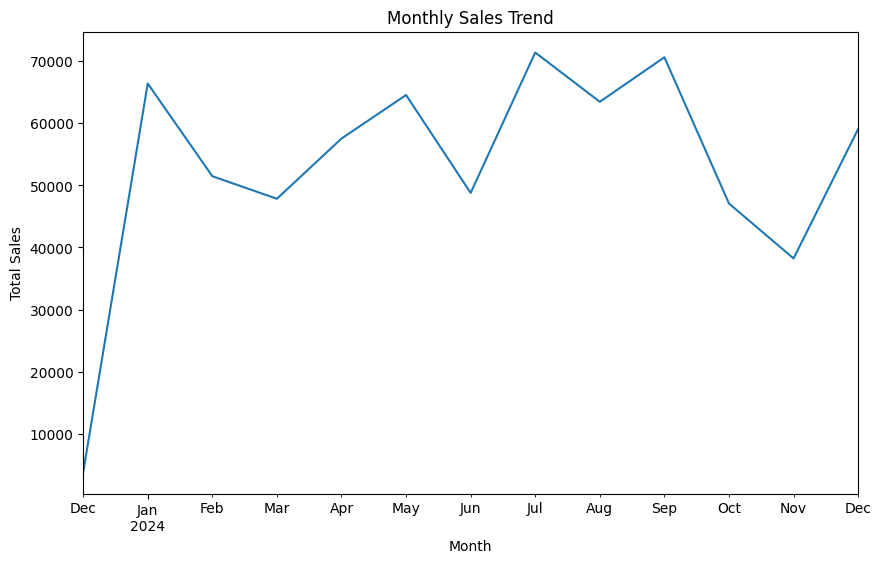

In [27]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', ylabel='Total Sales', xlabel='Month', figsize=(10, 6))
plt.show()

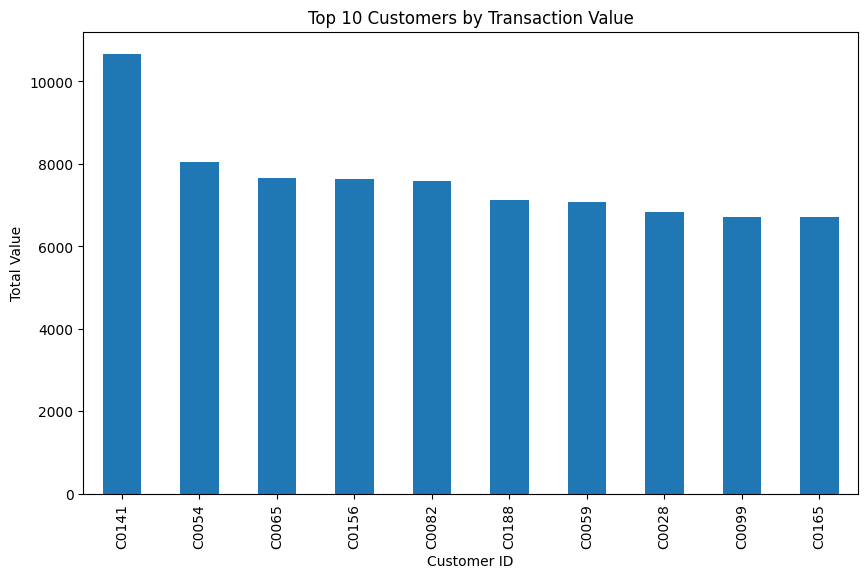

In [28]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Transaction Value', ylabel='Total Value', xlabel='Customer ID', figsize=(10, 6))
plt.show()